This notebook plots an example of an exchanged bug for presentation/explanatory purposes.

In [90]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [91]:
fexchanged = '../../data/analysis/exchange.labeled_otus.txt'
fotu = '../../data/clean/rosen.otu_table.rel_abun.clean'
fmeta = '../../data/clean/rosen.metadata.clean'

ex = pd.read_csv(fexchanged, sep='\t')
otu = pd.read_csv(fotu, sep='\t', index_col=0)
meta = pd.read_csv(fmeta, sep='\t', index_col=0)

In [92]:
samples = otu.index.tolist()
# Remove any samples corresponding to second time point
# Fundo samples end in F2 (corresponding to patient X-F1)
# gastric/throat time points end in GI/GF or TI/TF
exclude = ['2', 'F', 'sick', 'F2T']
for s in exclude:
    samples = [i for i in samples if not i.endswith(s)]
# And remove any lung transplant samples
samples = [i for i in samples if not i.startswith('05')]

print(otu.shape, meta.shape, len(samples))
otu = otu.loc[samples]
meta = meta.loc[samples]
print(otu.shape, meta.shape, len(samples))

((586, 1578), (586, 958), 461)
((461, 1578), (461, 958), 461)


In [93]:
ex.head()

,otu,bal-gastric_fluid,bal-throat_swab,gastric_fluid-throat_swab
0,k__Bacteria;p__;c__;o__;f__;g__;s__;d__denovo364,1.0,NaN,NaN
1,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,NaN,NaN,1.0
2,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,1.0,NaN,1.0
3,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,NaN,NaN,1.0
4,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,NaN,NaN,1.0


In [94]:
meta = meta[['sample_id.1', 'subject_id', 'site']]
meta.head()

,sample_id.1,subject_id,site
01-112-7GI,01-112-7GI,01-112-7,gastric_fluid
01-112-7RI,01-112-7RI,01-112-7,rectal_swab
01-112-7TI,01-112-7TI,01-112-7,throat_swab
01-164-7GI,01-164-7GI,01-164-7,gastric_fluid
01-164-7RI,01-164-7RI,01-164-7,rectal_swab


## bal-throat

In [95]:
balthr = otu[ex.dropna(subset=['bal-throat_swab'])['otu'].tolist()].reset_index()
balthr = balthr.rename(columns={'index': 'sample_id.1'})
print(balthr.shape)
#balthr.head()

(461, 13)


In [96]:
balthr = pd.merge(meta, balthr)
balthr.head()

,sample_id.1,subject_id,site,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae;g__Rothia;s__;d__denovo288,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__Porphyromonas;s__;d__denovo13,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__;s__;d__denovo19,k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella;s__;d__denovo213,k__Bacteria;p__Bacteroidetes;c__Flavobacteriia;o__Flavobacteriales;f__Flavobacteriaceae;g__;s__;d__denovo93,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Aerococcaceae;g__Abiotrophia;s__;d__denovo208,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__;d__denovo323,k__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Veillonellaceae;g__Centipeda;s__;d__denovo68,k__Bacteria;p__Firmicutes;c__Negativicutes;o__Selenomonadales;f__Veillonellaceae;g__Veillonella;s__;d__denovo26,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo306,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Fusobacteriaceae;g__Fusobacterium;s__;d__denovo8,k__Bacteria;p__Fusobacteria;c__Fusobacteriia;o__Fusobacteriales;f__Leptotrichiaceae;g__Streptobacillus;s__;d__denovo104
0,01-112-7GI,01-112-7,gastric_fluid,0.000000,0.000007,0.000011,0.0,0.000004,0.000000,0.000000,0.000007,0.000066,0.000000,0.000011,0.000000
1,01-112-7RI,01-112-7,rectal_swab,0.000000,0.000025,0.000004,0.0,0.000008,0.000000,0.000000,0.000000,0.000324,0.000008,0.000016,0.000000
2,01-112-7TI,01-112-7,throat_swab,0.000000,0.006197,0.001914,0.0,0.000000,0.000000,0.002273,0.017609,0.019954,0.007824,0.045172,0.000000
3,01-164-7GI,01-164-7,gastric_fluid,0.000101,0.002160,0.003435,0.0,0.000034,0.000011,0.001108,0.007934,0.012443,0.019035,0.118817,0.000022
4,01-164-7RI,01-164-7,rectal_swab,0.000000,0.000000,0.000000,0.0,0.000000,0.000028,0.000000,0.000000,0.000000,0.000000,0.000055,0.000000


In [97]:
balthr = balthr.melt(id_vars=['sample_id.1', 'subject_id', 'site'], var_name='otu', value_name='abun')
balthr.head()

,sample_id.1,subject_id,site,otu,abun
0,01-112-7GI,01-112-7,gastric_fluid,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000000
1,01-112-7RI,01-112-7,rectal_swab,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000000
2,01-112-7TI,01-112-7,throat_swab,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000000
3,01-164-7GI,01-164-7,gastric_fluid,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000101
4,01-164-7RI,01-164-7,rectal_swab,k__Bacteria;p__Actinobacteria;c__Actinobacteri...,0.000000


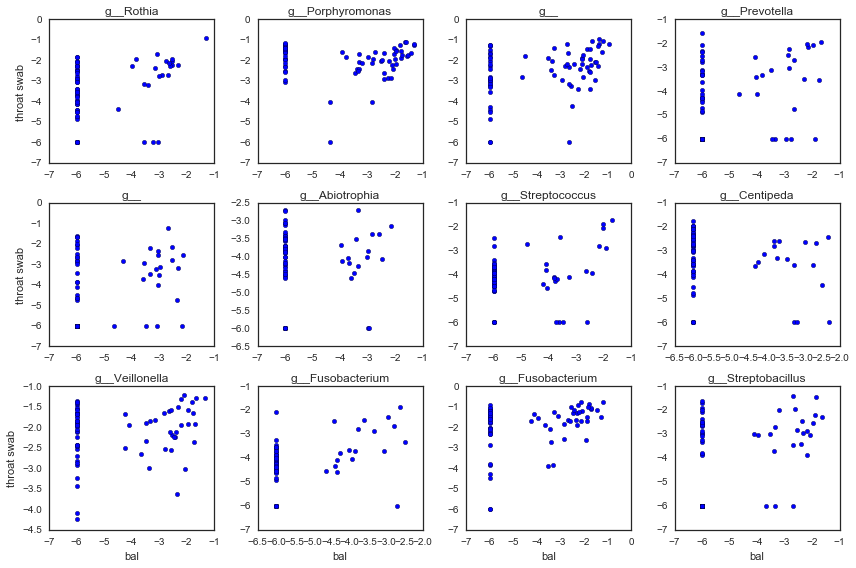

In [98]:
fig, ax = plt.subplots(3, 4, figsize=(12, 8))
ax = ax.flatten()
i = 0
for o, subdf in balthr.groupby('otu'):
    tidy = subdf.pivot(index='subject_id', columns='site', values='abun')
    toplot = tidy.dropna(subset=['bal', 'throat_swab'])
    ax[i].scatter(np.log10(toplot['bal'] + 1e-6), np.log10(toplot['throat_swab'] + 1e-6))
    ax[i].set_title(o.rsplit(';', 3)[1])
    i += 1

for i in [0, 4, 8]:
    ax[i].set_ylabel('throat swab')
for i in [8, 9, 10, 11]:
    ax[i].set_xlabel('bal')

fig.tight_layout()

## bal-gastric

In [99]:
balgas = otu[ex.dropna(subset=['bal-gastric_fluid'])['otu'].tolist()].reset_index()
balgas = balgas.rename(columns={'index': 'sample_id.1'})
print(balgas.shape)

balgas = pd.merge(meta, balgas)
balgas = balgas.melt(id_vars=['sample_id.1', 'subject_id', 'site'], var_name='otu', value_name='abun')
len(balgas['otu'].unique())

(461, 74)


73

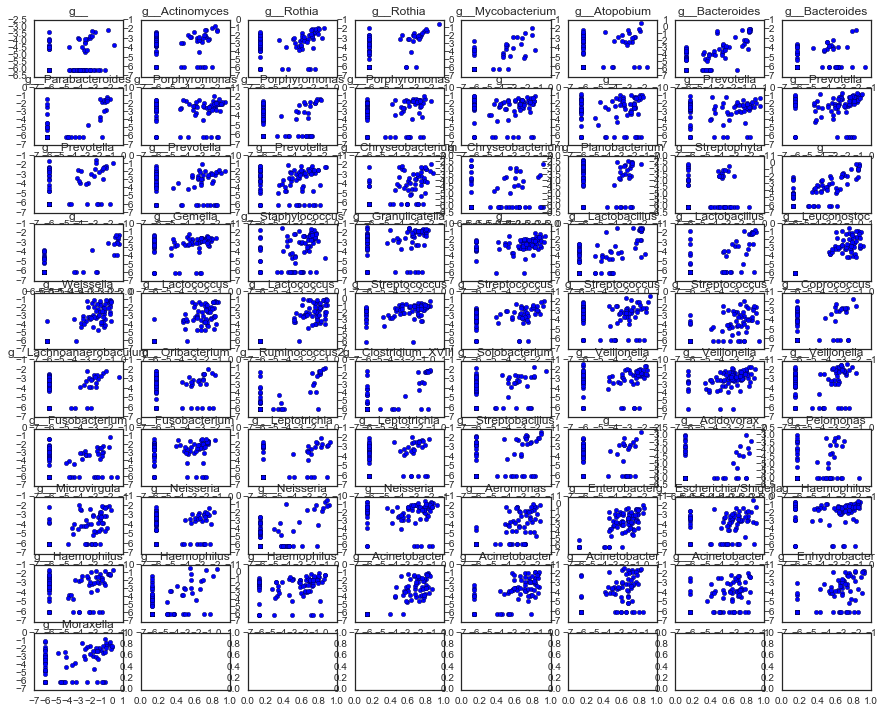

In [100]:
fig, ax = plt.subplots(10, 8, figsize=(15, 12))
ax = ax.flatten()
i = 0
for o, subdf in balgas.groupby('otu'):
    tidy = subdf.pivot(index='subject_id', columns='site', values='abun')
    toplot = tidy.dropna(subset=['bal', 'gastric_fluid'])
    ax[i].scatter(np.log10(toplot['bal'] + 1e-6), np.log10(toplot['gastric_fluid'] + 1e-6))
    ax[i].set_title(o.rsplit(';', 3)[1])
    i += 1


## gastric-throat

In [101]:
gasthr = otu[ex.dropna(subset=['gastric_fluid-throat_swab'])['otu'].tolist()].reset_index()
gasthr = gasthr.rename(columns={'index': 'sample_id.1'})
print(gasthr.shape)

gasthr = pd.merge(meta, gasthr)
gasthr = gasthr.melt(id_vars=['sample_id.1', 'subject_id', 'site'], var_name='otu', value_name='abun')
len(gasthr['otu'].unique())

(461, 119)


118

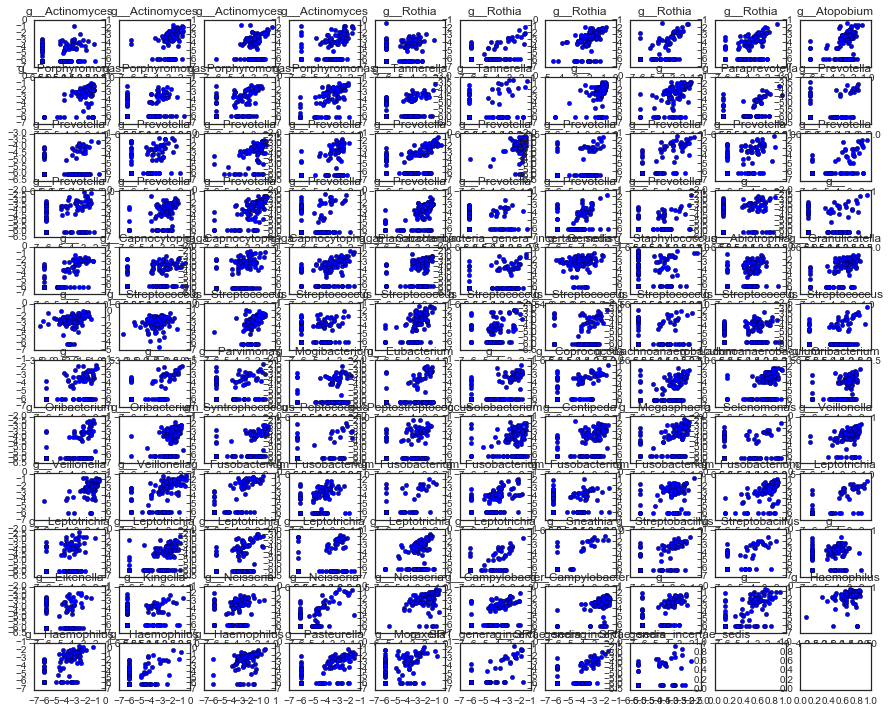

In [102]:
fig, ax = plt.subplots(12, 10, figsize=(15, 12))
ax = ax.flatten()
i = 0
for o, subdf in gasthr.groupby('otu'):
    tidy = subdf.pivot(index='subject_id', columns='site', values='abun')
    toplot = tidy.dropna(subset=['gastric_fluid', 'throat_swab'])
    ax[i].scatter(np.log10(toplot['throat_swab'] + 1e-6), np.log10(toplot['gastric_fluid'] + 1e-6))
    ax[i].set_title(o.rsplit(';', 3)[1])
    i += 1


# One example for presentation

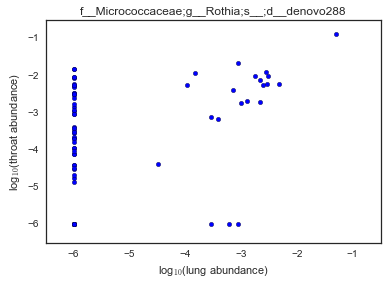

In [103]:
sns.set_style('white')
o = 'k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Micrococcaceae;g__Rothia;s__;d__denovo288'

tidy = balthr.query('otu == @o').pivot(index='subject_id', columns='site', values='abun')
toplot = tidy.dropna(subset=['bal', 'throat_swab'])

plt.scatter(np.log10(toplot['bal'] + 1e-6), np.log10(toplot['throat_swab'] + 1e-6))
plt.xlabel('log$_{10}$(lung abundance)')
plt.ylabel('log$_{10}$(throat abundance)')
plt.xlim([-6.5, -0.5])
plt.ylim([-6.5, -0.5])
plt.title(';'.join(o.rsplit(';', 4)[1:]))